In [1]:
### Data COllection
import pandas_datareader as pdr

In [2]:
df = pdr.get_data_tiingo('AAPL', api_key = '6f9002529ac3c146859dfad9e91dfd714b22ead2')

In [3]:
df.to_csv('AAPL.csv')

In [4]:
import pandas as pd

In [5]:
df = pd.read_csv('AAPL.csv')

In [6]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2016-03-28 00:00:00+00:00,105.19,106.19,105.06,106.00,19411372,24.455280,24.687767,24.425057,24.643594,77645488,0.0,1.0
1,AAPL,2016-03-29 00:00:00+00:00,107.68,107.79,104.88,104.89,31190083,25.034172,25.059745,24.383209,24.385534,124760332,0.0,1.0
2,AAPL,2016-03-30 00:00:00+00:00,109.56,110.42,108.60,108.65,45601149,25.471247,25.671185,25.248060,25.259684,182404596,0.0,1.0
3,AAPL,2016-03-31 00:00:00+00:00,108.99,109.90,108.88,109.72,25888449,25.338729,25.550292,25.313156,25.508445,103553796,0.0,1.0
4,AAPL,2016-04-01 00:00:00+00:00,109.99,110.00,108.20,108.78,25873950,25.571216,25.573541,25.155065,25.289907,103495800,0.0,1.0


In [7]:
df2 = df.reset_index()['close']

In [8]:
df2[1228:]

1228    135.390
1229    135.130
1230    135.370
1231    133.190
1232    130.840
1233    129.710
1234    129.870
1235    126.000
1236    125.860
1237    125.350
1238    120.990
1239    121.260
1240    127.790
1241    125.120
1242    122.060
1243    120.130
1244    121.420
1245    116.360
1246    121.085
1247    119.980
1248    121.960
1249    121.030
1250    123.990
1251    125.570
1252    124.760
1253    120.530
1254    119.990
1255    123.390
1256    122.540
1257    120.090
Name: close, dtype: float64

In [9]:
df2.shape

(1258,)

In [10]:
import matplotlib.pyplot as plt
plt.plot(df2)

In [11]:
#Apply MinMax scaler

In [12]:
import numpy as np

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
df2 = scaler.fit_transform(np.array(df2).reshape(-1,1))

In [14]:
df2.shape

(1258, 1)

In [15]:
df2  #now values are between 0-1

array([[0.03571858],
       [0.04170776],
       [0.04622971],
       ...,
       [0.07949489],
       [0.07745039],
       [0.07155743]])

In [16]:
## splitting dataset into training and testing
train_size = int(len(df2) * 0.70)
test_size = len(df2) - train_size
train_data, test_data = df2[0:train_size, :], df2[train_size:len(df2), :1]

In [17]:
train_size, test_size

(880, 378)

In [18]:
train_data

array([[0.03571858],
       [0.04170776],
       [0.04622971],
       [0.04485869],
       [0.04726398],
       [0.04998196],
       [0.04683103],
       [0.04959711],
       [0.04377631],
       [0.04406494],
       [0.04493085],
       [0.04834636],
       [0.05219483],
       [0.05233915],
       [0.04692724],
       [0.0412267 ],
       [0.03985568],
       [0.04038485],
       [0.03759471],
       [0.03689717],
       [0.035454  ],
       [0.03369814],
       [0.01799158],
       [0.01079976],
       [0.00817799],
       [0.00793746],
       [0.01164161],
       [0.00926037],
       [0.00697535],
       [0.00572459],
       [0.00589296],
       [0.0074083 ],
       [0.00521948],
       [0.        ],
       [0.00043295],
       [0.00851473],
       [0.00757667],
       [0.01015033],
       [0.00928443],
       [0.01173782],
       [0.01464823],
       [0.018184  ],
       [0.02232111],
       [0.02422129],
       [0.02407697],
       [0.02289838],
       [0.01953097],
       [0.017

In [19]:
import numpy
#convert on array of values into a dataset matrix
def create_dataset(dataset, time_step = 1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i+time_step), 0]   ## {0,1,2,------,99  100
                                          ##  1,2,3,-----,100  101}
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [20]:
#Reshape into X = t, t+1, t+2, t+3, Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [21]:
print(X_train)

[[0.03571858 0.04170776 0.04622971 ... 0.0429104  0.04603728 0.04579675]
 [0.04170776 0.04622971 0.04485869 ... 0.04603728 0.04579675 0.04541191]
 [0.04622971 0.04485869 0.04726398 ... 0.04579675 0.04541191 0.04507517]
 ...
 [0.27410704 0.27485268 0.26537583 ... 0.3088635  0.31162959 0.31355382]
 [0.27485268 0.26537583 0.28906795 ... 0.31162959 0.31355382 0.31853277]
 [0.26537583 0.28906795 0.2857727  ... 0.31355382 0.31853277 0.31417919]]


In [22]:
X_train.shape, y_train.shape

((779, 100), (779,))

In [23]:
#reshape input to be [samples,time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [24]:
## create stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [25]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (100, 1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 100, batch_size = 64, verbose = 1)

Epoch 1/100
13/13 [==============================] - 5s 158ms/step - loss: 0.0175 - val_loss: 0.0527
Epoch 2/100
13/13 [==============================] - 1s 97ms/step - loss: 0.0028 - val_loss: 0.0276
Epoch 3/100
13/13 [==============================] - 1s 97ms/step - loss: 0.0011 - val_loss: 0.0241
Epoch 4/100
13/13 [==============================] - 1s 96ms/step - loss: 5.5993e-04 - val_loss: 0.0225
Epoch 5/100
13/13 [==============================] - 1s 96ms/step - loss: 3.7153e-04 - val_loss: 0.0235
Epoch 6/100
13/13 [==============================] - 1s 99ms/step - loss: 4.2568e-04 - val_loss: 0.0220
Epoch 7/100
13/13 [==============================] - 1s 95ms/step - loss: 3.8668e-04 - val_loss: 0.0211
Epoch 8/100
13/13 [==============================] - 1s 97ms/step - loss: 3.6088e-04 - val_loss: 0.0207
Epoch 9/100
13/13 [==============================] - 1s 96ms/step - loss: 3.6903e-04 - val_loss: 0.0203
Epoch 10/100
13/13 [==============================] - 1s 96ms/step - loss: 

Epoch 79/100
13/13 [==============================] - 1s 100ms/step - loss: 1.5736e-04 - val_loss: 0.0102
Epoch 80/100
13/13 [==============================] - 1s 101ms/step - loss: 1.4154e-04 - val_loss: 0.0091
Epoch 81/100
13/13 [==============================] - 1s 101ms/step - loss: 1.2741e-04 - val_loss: 0.0095
Epoch 82/100
13/13 [==============================] - 1s 104ms/step - loss: 1.6323e-04 - val_loss: 0.0106
Epoch 83/100
13/13 [==============================] - 1s 101ms/step - loss: 1.3845e-04 - val_loss: 0.0099
Epoch 84/100
13/13 [==============================] - 1s 100ms/step - loss: 1.0595e-04 - val_loss: 0.0098
Epoch 85/100
13/13 [==============================] - 1s 103ms/step - loss: 1.1855e-04 - val_loss: 0.0094
Epoch 86/100
13/13 [==============================] - 1s 101ms/step - loss: 1.0969e-04 - val_loss: 0.0094
Epoch 87/100
13/13 [==============================] - 1s 104ms/step - loss: 1.2004e-04 - val_loss: 0.0096
Epoch 88/100
13/13 [==========================

In [28]:
import tensorflow as tf

In [29]:
print(tf.__version__)

2.4.1


In [30]:
## do the prediction and check performance metrics
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [31]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [32]:
## calculate RMSE performance matrics for training dataset
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, train_predict))

172.08145447844367

In [33]:
## Test Data RMSE
math.sqrt(mean_squared_error(y_test, test_predict))

## different between thoes 2 errors are very less.

245.82839650085486

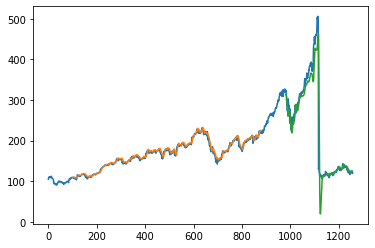

In [34]:
## plotting
# shift train prediction for plotting
look_back = 100
trainPredictPlot = numpy.empty_like(df2)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back : len(train_predict) + look_back, :] = train_predict
# shift  test prediction for plotting
testPredictPlot = numpy.empty_like(df2)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict) + (look_back * 2) + 1:len(df2) - 1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df2))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

# Green line - for test data
# Orange line - for train data

In [35]:
len(test_data)

378

In [36]:
x_input = test_data[278:].reshape(1,-1)
x_input.shape

(1, 100)

In [37]:
x_input.shape

(1, 100)

In [38]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [39]:
temp_input

[0.06008418520745634,
 0.04454600120264579,
 0.04432952495490078,
 0.04834636199639203,
 0.05919422730006013,
 0.06900781719783522,
 0.06819001803968727,
 0.062489476849067915,
 0.06164762477450386,
 0.0701142513529765,
 0.0694407696933253,
 0.06956103427540589,
 0.07206253758268188,
 0.06987372218881538,
 0.0666025255562237,
 0.06806975345760674,
 0.0649428743235117,
 0.056548406494287384,
 0.05972339146121464,
 0.06179194227300061,
 0.06313890559230306,
 0.06905592303066743,
 0.07788334335538183,
 0.07874924834636199,
 0.07841250751653633,
 0.07675285628382439,
 0.08036079374624172,
 0.08187612748045697,
 0.07562236921226695,
 0.0791340950090198,
 0.07713770294648226,
 0.07562236921226695,
 0.0902946482260974,
 0.0901262778111846,
 0.09226698737221883,
 0.08734816596512324,
 0.0911365003006614,
 0.09991581479254358,
 0.09770294648226097,
 0.10013229104028859,
 0.11148526758869509,
 0.10710763680096214,
 0.1043415514131088,
 0.10186410102224891,
 0.09397474443776305,
 0.09782321106434

In [43]:
# demonstrate prediction for next 30 days
from numpy import array

lst_output = []
n_steps = 100
i = 0
while(i < 30):
    
    if (len(temp_input) > 100):
        #print(temp_input)
        x_input = np.array(temp_input[1:])
        print("{} day input {}".format(i, x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose = 0)
        print("{} day output {}".format(i, yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i = i + 1
    else:
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose = 0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i = i + 1
    
print(lst_output)

0 day input [0.044546   0.04432952 0.04834636 0.05919423 0.06900782 0.06819002
 0.06248948 0.06164762 0.07011425 0.06944077 0.06956103 0.07206254
 0.06987372 0.06660253 0.06806975 0.06494287 0.05654841 0.05972339
 0.06179194 0.06313891 0.06905592 0.07788334 0.07874925 0.07841251
 0.07675286 0.08036079 0.08187613 0.07562237 0.0791341  0.0771377
 0.07562237 0.09029465 0.09012628 0.09226699 0.08734817 0.0911365
 0.09991581 0.09770295 0.10013229 0.11148527 0.10710764 0.10434155
 0.1018641  0.09397474 0.09782321 0.08721587 0.09760673 0.10032471
 0.09294047 0.09250752 0.09753458 0.0927721  0.08851473 0.09017438
 0.10027661 0.11191822 0.11720986 0.12647023 0.1270475  0.12440168
 0.11244738 0.10010824 0.10535177 0.10739627 0.10487072 0.11316897
 0.11165364 0.11201443 0.10984967 0.10835839 0.10773301 0.10831028
 0.10306675 0.09741431 0.09469633 0.09508118 0.0857727  0.08543596
 0.08420926 0.07372219 0.07437162 0.09007817 0.08365604 0.07629585
 0.07165364 0.07475646 0.06258569 0.07395069 0.07129

14 day output [[0.09492124]]
15 day input [0.06494287 0.05654841 0.05972339 0.06179194 0.06313891 0.06905592
 0.07788334 0.07874925 0.07841251 0.07675286 0.08036079 0.08187613
 0.07562237 0.0791341  0.0771377  0.07562237 0.09029465 0.09012628
 0.09226699 0.08734817 0.0911365  0.09991581 0.09770295 0.10013229
 0.11148527 0.10710764 0.10434155 0.1018641  0.09397474 0.09782321
 0.08721587 0.09760673 0.10032471 0.09294047 0.09250752 0.09753458
 0.0927721  0.08851473 0.09017438 0.10027661 0.11191822 0.11720986
 0.12647023 0.1270475  0.12440168 0.11244738 0.10010824 0.10535177
 0.10739627 0.10487072 0.11316897 0.11165364 0.11201443 0.10984967
 0.10835839 0.10773301 0.10831028 0.10306675 0.09741431 0.09469633
 0.09508118 0.0857727  0.08543596 0.08420926 0.07372219 0.07437162
 0.09007817 0.08365604 0.07629585 0.07165364 0.07475646 0.06258569
 0.07395069 0.07129284 0.07605532 0.0738184  0.08093806 0.08473842
 0.08279014 0.07261575 0.0713169  0.07949489 0.07745039 0.07155743
 0.08208231 0.081782

22 day output [[0.10289397]]
23 day input [0.07841251 0.07675286 0.08036079 0.08187613 0.07562237 0.0791341
 0.0771377  0.07562237 0.09029465 0.09012628 0.09226699 0.08734817
 0.0911365  0.09991581 0.09770295 0.10013229 0.11148527 0.10710764
 0.10434155 0.1018641  0.09397474 0.09782321 0.08721587 0.09760673
 0.10032471 0.09294047 0.09250752 0.09753458 0.0927721  0.08851473
 0.09017438 0.10027661 0.11191822 0.11720986 0.12647023 0.1270475
 0.12440168 0.11244738 0.10010824 0.10535177 0.10739627 0.10487072
 0.11316897 0.11165364 0.11201443 0.10984967 0.10835839 0.10773301
 0.10831028 0.10306675 0.09741431 0.09469633 0.09508118 0.0857727
 0.08543596 0.08420926 0.07372219 0.07437162 0.09007817 0.08365604
 0.07629585 0.07165364 0.07475646 0.06258569 0.07395069 0.07129284
 0.07605532 0.0738184  0.08093806 0.08473842 0.08279014 0.07261575
 0.0713169  0.07949489 0.07745039 0.07155743 0.08208231 0.08178244
 0.08204009 0.08271059 0.08362231 0.08464856 0.08571451 0.08678344
 0.08784086 0.08888333 

In [45]:
day_new = np.arange(1,101) # past 100 days
day_pred = np.arange(101, 131) # future 30 days

In [46]:
import matplotlib.pyplot as plt

In [47]:
len(df2)

1258

In [48]:
df3 = df2.tolist()

In [50]:
df3.extend(lst_output)

In [51]:
df3

[[0.03571858087793145],
 [0.04170775706554419],
 [0.0462297053517739],
 [0.044858689116055284],
 [0.04726398075766686],
 [0.04998196031268792],
 [0.04683102826217678],
 [0.049597113650030056],
 [0.04377630787733011],
 [0.0440649428743235],
 [0.04493084786530366],
 [0.04834636199639203],
 [0.052194828622970535],
 [0.05233914612146717],
 [0.0469272399278412],
 [0.0412266987372219],
 [0.03985568250150329],
 [0.04038484666265779],
 [0.03759470835838841],
 [0.0368971737823211],
 [0.03545399879735417],
 [0.033698135898977744],
 [0.01799158147925431],
 [0.010799759470835807],
 [0.008177991581479221],
 [0.007937462417318075],
 [0.011641611545399888],
 [0.009260372820204421],
 [0.006975345760673435],
 [0.005724594107035463],
 [0.005892964521948291],
 [0.007408298256163542],
 [0.005219482862297037],
 [0.0],
 [0.0004329524954900521],
 [0.008514732411304848],
 [0.007576668671076342],
 [0.010150330727600715],
 [0.009284425736620555],
 [0.011737823211064313],
 [0.014648226097414313],
 [0.01818400481

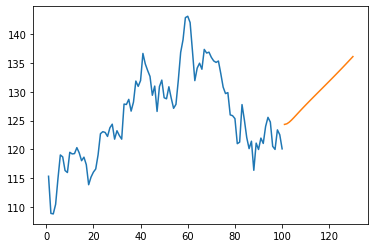

In [52]:
plt.plot(day_new, scaler.inverse_transform(df2[1158:]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))

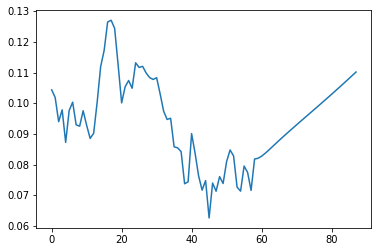

In [54]:
df3 = df2.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])